# Lecture des données depuis HDFS

In [1]:
import pyspark
from pyspark import SparkConf,SparkContext


## Configuration 

In [2]:
conf = pyspark.SparkConf().setAll([('spark.executor.memory', '8g'), ('spark.executor.cores', '3'), ('spark.cores.max', '3'), ('spark.driver.memory','8g')])

sc = pyspark.SparkContext(conf=conf)

sqlContext = pyspark.SQLContext(sc)


## Read data from HDFS

In [3]:
#data00 = sqlContext.read.json("hdfs://172.17.0.3:8020/user/root/ProjetFinal/teleCoroFr/data_CoronaWork_dict.json")

In [4]:
data_spark = sqlContext.read.option("header", "true").option("delimiter", ",").csv("hdfs://172.17.0.3:8020/user/root/ProjetFinal/teleCoroFr/data_CoronaWork_CSV_Clean.csv")

In [5]:
data_spark.collect()

[Row(Avis_efficacite_travail_confine='2', lieu_confinement='Dans votre résidence secondaire', variation_temps_travail_conf='3', nbre_personne_dans_lieu_conf='2.0', efficacite_consignes_teletravaildonne_par_employeur='3', progression_sur_outils_collaboratifs='Un peu', age='71.0', eval_suivi_actualite='3', frequence_sortir_en_semaine='Une fois par jour', eval_frequence_interaction_avec_collegues_enconf='3', evaluation_condition_travail_avant_conf='4', Consequence_negatives_teletravailconfines="La communication avec vos collègues est moins fluide,Vous vous sentez isolé.e,C'est difficile de se concentrer", impact_confinnement_relations_avec_confines='Oui, on est plus proches', nature_travail='Travailler en équipe', nbre_enfants_moins_12='0.0', eval_contact_avec_famille='2', isolation_pour travailler='Oui', evaluation_concentration_enconf='2', avantage_teletravail_confin='Vous dormez mieux', fréquence_téletravail_avant_conf='1 fois par semaine', reamenagement_heures_travails_habituels='Non'

In [7]:
data_pd=data_spark.toPandas()

In [9]:
data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1489 entries, 0 to 1488
Data columns (total 46 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   Avis_efficacite_travail_confine                      1489 non-null   object
 1   lieu_confinement                                     1489 non-null   object
 2   variation_temps_travail_conf                         1489 non-null   object
 3   nbre_personne_dans_lieu_conf                         1489 non-null   object
 4   efficacite_consignes_teletravaildonne_par_employeur  1489 non-null   object
 5   progression_sur_outils_collaboratifs                 1489 non-null   object
 6   age                                                  1489 non-null   object
 7   eval_suivi_actualite                                 1489 non-null   object
 8   frequence_sortir_en_semaine                          1489 non-null   object
 9

In [10]:
data_pd.describe()

,Avis_efficacite_travail_confine,lieu_confinement,variation_temps_travail_conf,nbre_personne_dans_lieu_conf,efficacite_consignes_teletravaildonne_par_employeur,progression_sur_outils_collaboratifs,age,eval_suivi_actualite,frequence_sortir_en_semaine,eval_frequence_interaction_avec_collegues_enconf,...,satisfaction_equipement_bureautique,region,cause_distraction,longitude,latitude,nbre_personne_symptem_covid,apprend_de_cette_experience,eval_bien_etre_apres_conf,eval_bien_etre_avant_conf,statut_familial
count,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489,...,1489,1489,1489,1489,1489,1489,1489,1489,1489,1489
unique,5,15,5,10,5,4,55,5,5,5,...,5,13,311,13,13,4,172,5,5,4
top,3,Dans votre domicile,3,2.0,4,"Non, je les utilisais déjà beaucoup",27.0,3,Une fois dans la semaine ou moins,3,...,4,11,Vous n'êtes pas particulièrement distrait.e,2.50339683029,48.6889749341,1-3 personnes,A changer mes priorités,3.0,4.0,En couple et nous sommes confinés ensemble
freq,592,1292,535,514,657,599,80,534,714,423,...,527,1024,274,1024,715,706,234,582,757,1006


# Histogramme

In [33]:
def histogram_graphe(colonne,xaxis=1 ,yaxis = 1):
    # Répartition des départements
    nb_per_col = colonne.value_counts()


    # ----------------------------------------------------------
    nb_per_col.plot.barh() 
    

## Efficacité

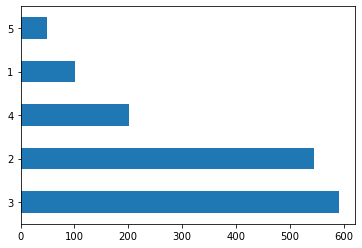

In [34]:
histogram_graphe(data_pd['Avis_efficacite_travail_confine'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## variation_temps_travail_conf

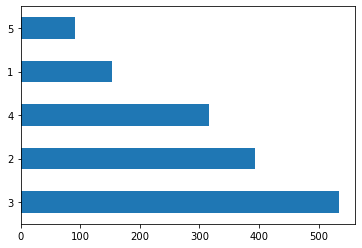

In [35]:
histogram_graphe(data_pd['variation_temps_travail_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## nbre_personne_dans_lieu_conf

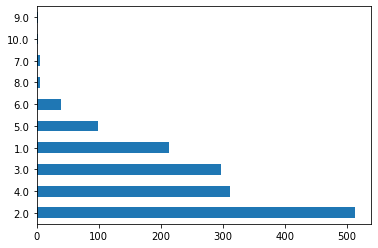

In [36]:
histogram_graphe(data_pd['nbre_personne_dans_lieu_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## efficacite_consignes_teletravaildonne_par_employeur

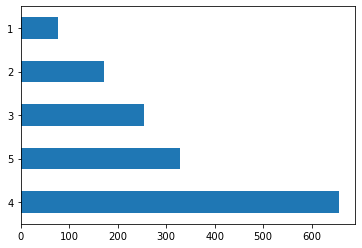

In [37]:
histogram_graphe(data_pd['efficacite_consignes_teletravaildonne_par_employeur'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_frequence_interaction_avec_collegues_enconf

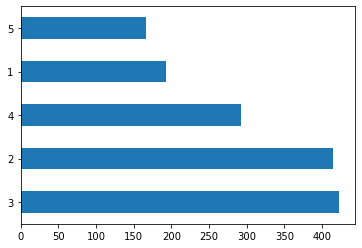

In [38]:
histogram_graphe(data_pd['eval_frequence_interaction_avec_collegues_enconf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluation_condition_travail_avant_conf

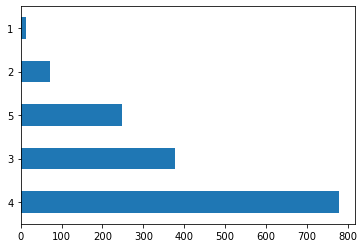

In [39]:
histogram_graphe(data_pd['evaluation_condition_travail_avant_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## nbre_enfants_moins_12

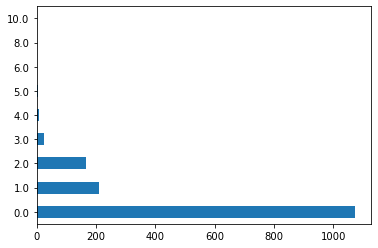

In [40]:
histogram_graphe(data_pd['nbre_enfants_moins_12'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_contact_avec_famille

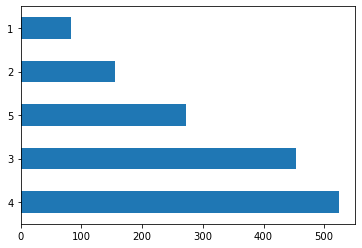

In [42]:
histogram_graphe(data_pd['eval_contact_avec_famille'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluation_manger

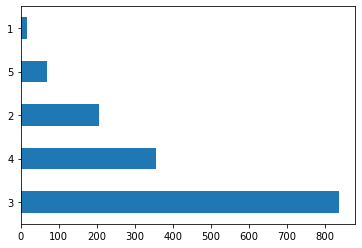

In [43]:
histogram_graphe(data_pd['evaluation_manger'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluatuin_boire_alcool

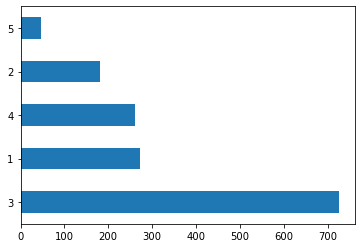

In [44]:
histogram_graphe(data_pd['evaluatuin_boire_alcool'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## evaluation_condition_travail_apres_debut_conf

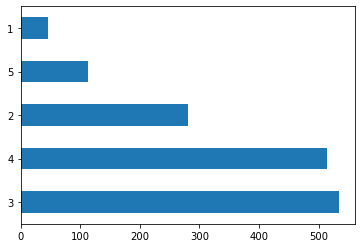

In [46]:
histogram_graphe(data_pd['evaluation_condition_travail_apres_debut_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## activite_sportif

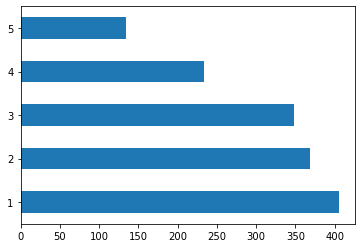

In [47]:
histogram_graphe(data_pd['activite_sportif'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## soin_apparence_en_conf

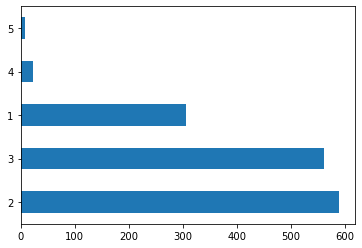

In [48]:
histogram_graphe(data_pd['soin_apparence_en_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## satisfaction_equipement_bureautique

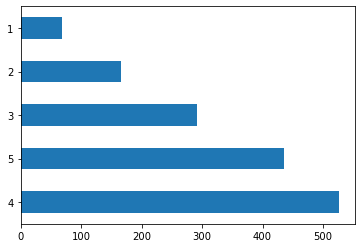

In [49]:
histogram_graphe(data_pd['satisfaction_equipement_bureautique'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_bien_etre_apres_conf

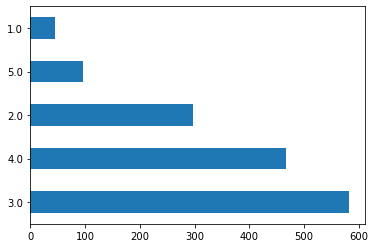

In [51]:
histogram_graphe(data_pd['eval_bien_etre_apres_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')

## eval_bien_etre_avant_conf

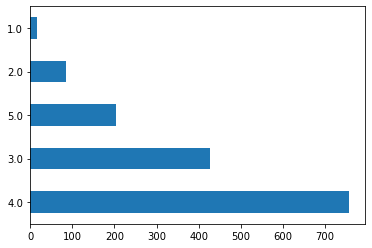

In [50]:
histogram_graphe(data_pd['eval_bien_etre_avant_conf'])
#plot.savefig('Img_teleconf_Fr/hist_efficacite.png')